In [32]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# División del dataset

In [43]:
base_dir = "C:/Users/gonibix23/Downloads/Dataset P2/Celebrity Faces Dataset"
output_dir = "dataset"  # Carpeta donde guardarás los datos divididos

# Crear carpetas para train, val y test
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")
test_dir = os.path.join(output_dir, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Proporciones para train, val y test
train_split = 0.7
val_split = 0.15  # Resto será para test

# Dividir imágenes por clase
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # Crear carpetas para cada clase en train, val y test
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Obtener todas las imágenes de la clase
    images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))]

    # Dividir imágenes
    train_images, temp_images = train_test_split(images, test_size=1-train_split, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=val_split/(1-train_split), random_state=42)

    # Mover imágenes
    for img in train_images:
        shutil.copy(img, os.path.join(train_dir, class_name))
    for img in val_images:
        shutil.copy(img, os.path.join(val_dir, class_name))
    for img in test_images:
        shutil.copy(img, os.path.join(test_dir, class_name))

print("Dataset dividido en train, val y test.")

Dataset dividido en train, val y test.


# Carga del dataset

In [ ]:
# Define paths
base_dir = 'dataset'  # Cambia esto a la ruta de tu dataset
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Define hiperparámetros
img_height, img_width = 224, 224  # Tamaño de las imágenes
batch_size = 32

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalizar píxeles a rango [0, 1]
    rotation_range=40,  # Rotación aleatoria en grados
    width_shift_range=0.2,  # Desplazamiento horizontal
    height_shift_range=0.2,  # Desplazamiento vertical
    shear_range=0.2,  # Transformación en cizalla
    zoom_range=0.2,  # Zoom aleatorio
    horizontal_flip=True,  # Inversión horizontal
    fill_mode='nearest'  # Rellenar píxeles vacíos
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Cargar datos y dividir en train/val/test
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1243 images belonging to 17 classes.
Found 270 images belonging to 17 classes.
Found 287 images belonging to 17 classes.


# Creación del modelo

In [49]:
# Modelo secuencial
model = tf.keras.models.Sequential()

# Bloque 1
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Bloque 2
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Bloque 3
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Bloque 4
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Bloque 5
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Fully connected layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax'))

In [50]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 conv2d_75 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 conv2d_77 (Conv2D)          (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 37, 37, 128)      0         
 g2D)                                                

In [51]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo

In [ ]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
 4/39 [==>...........................] - ETA: 2:34 - loss: 10.7758 - accuracy: 0.1172

# Evaluación del modelo

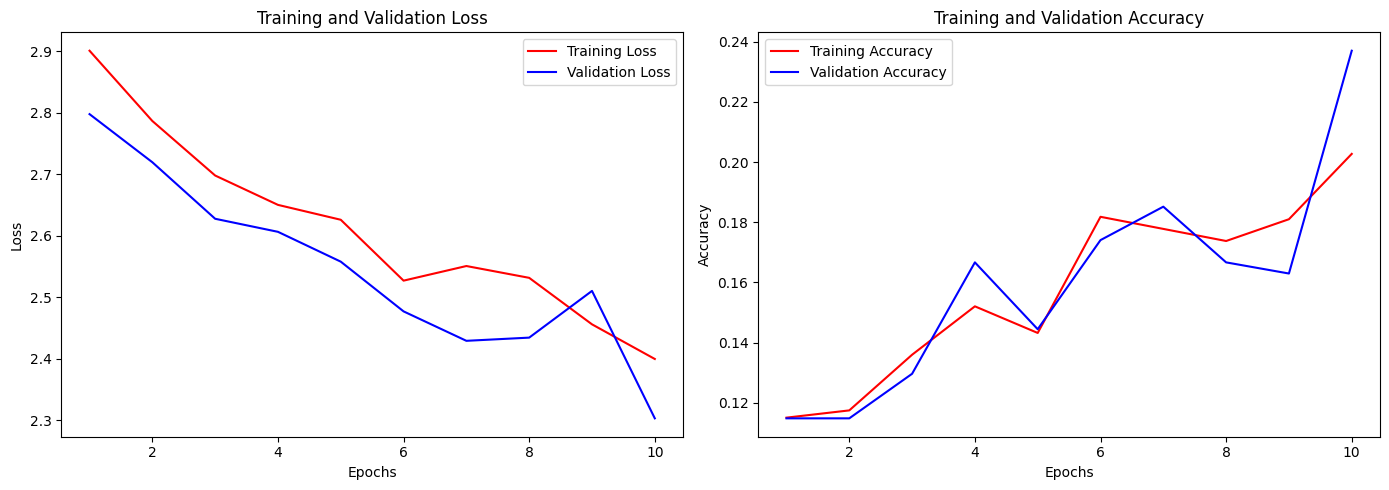

In [39]:
epochs = range(1, len(history.history['accuracy']) + 1)
# Pérdida (Loss)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], 'r', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Precisión (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## F1 Score

In [40]:
# Obtener etiquetas verdaderas y predicciones del modelo
y_true = []
y_pred = []

# Recorrer el generador de prueba para obtener las etiquetas verdaderas y las predicciones
for batch in test_generator:
    # Obtener imágenes y etiquetas verdaderas
    X, y = batch
    true_labels = np.argmax(y, axis=1)  # Convertir one-hot encoding a índices
    y_true.extend(true_labels)

    # Obtener predicciones del modelo
    preds = model.predict(X)
    predicted_labels = np.argmax(preds, axis=1)
    y_pred.extend(predicted_labels)

    # Detenerse si se han recorrido todas las imágenes
    if len(y_true) >= test_generator.samples:
        break

# Calcular el F1 Score
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# O calcular solo el F1 Score promedio
f1 = f1_score(y_true, y_pred, average='weighted')  # 'weighted' para manejar clases desbalanceadas
print(f"F1 Score (weighted): {f1:.2f}")

1/1 [==============================] - 0s 99ms/step
Classification Report:
                    precision    recall  f1-score   support

    Angelina Jolie       0.20      0.31      0.24        16
         Brad Pitt       0.00      0.00      0.00        16
 Denzel Washington       0.31      0.56      0.40        16
      Hugh Jackman       0.00      0.00      0.00        16
 Jennifer Lawrence       0.67      0.12      0.21        16
       Johnny Depp       0.00      0.00      0.00        16
      Kate Winslet       0.12      0.06      0.08        16
 Leonardo DiCaprio       0.26      0.31      0.29        16
         Megan Fox       0.22      0.69      0.33        16
   Natalie Portman       0.14      0.06      0.09        16
     Nicole Kidman       0.38      0.38      0.38        16
  Robert Downey Jr       0.14      0.06      0.09        16
    Sandra Bullock       0.40      0.12      0.19        16
Scarlett Johansson       0.38      0.68      0.48        31
        Tom Cruise      

c:\Users\gonibix23\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gonibix23\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gonibix23\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf